<ipython-input-2-d1f492bc9b22>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  combined_selection = df.iloc[selected_countries_indices][df['Date'].between(start_date, end_date)]
<ipython-input-2-d1f492bc9b22>:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


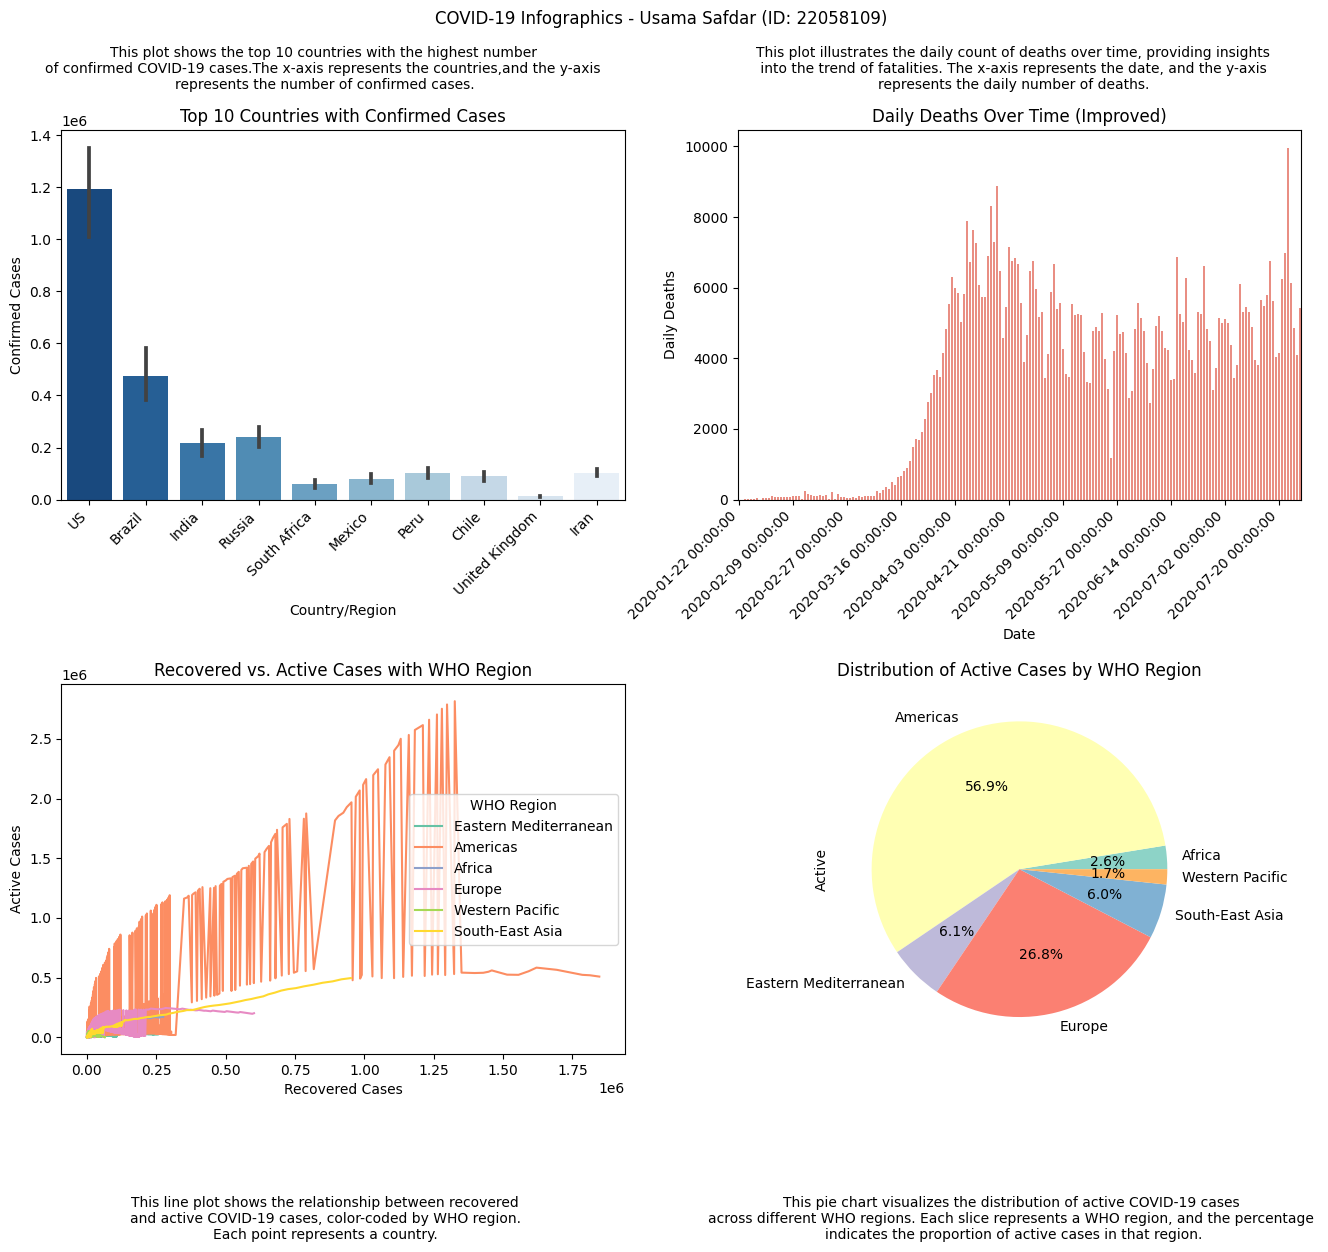

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def statistical_analysis(df):
    # Descriptive Statistics Summary (using Pandas)
    summary_stats = df.describe()

    # Unary UFuncs
    confirmed_arr = df['Confirmed'].to_numpy()
    log_confirmed_arr = np.log1p(confirmed_arr)
    sqrt_deaths_arr = np.sqrt(df['Deaths'].to_numpy())

    # Comparisons
    confirmed_gt_100k = df['Confirmed'] > 100000
    deaths_lt_100 = df['Deaths'] < 100

    # Masks
    mask_high_confirmed = df['Confirmed'] > 100000
    mask_low_deaths = df['Deaths'] < 1000

    # Boolean Logic
    selected_countries = df[mask_high_confirmed & mask_low_deaths]

    # Combined Indexing
    selected_countries_indices = [3, 8, 63, 15, 21]
    start_date = '2020-01-22'
    end_date = '2020-01-25'

    # Select countries using fancy indexing and filter data within a date range
    combined_selection = df.iloc[selected_countries_indices][df['Date'].between(start_date, end_date)]

    # Sorting by Confirmed Cases in Descending Order
    sorted_by_confirmed = df.sort_values(by='Confirmed', ascending=False)

    # Partial Sorts: Partitioning
    df['Date'] = pd.to_datetime(df['Date'])
    selected_country = 'US'
    selected_country_data = df[df['Country/Region'] == selected_country]
    k = 5
    partitioned_data = np.partition(selected_country_data['Confirmed'].values, -k)[-k:]

    return summary_stats, log_confirmed_arr, sqrt_deaths_arr, confirmed_gt_100k, deaths_lt_100, selected_countries, combined_selection, sorted_by_confirmed, partitioned_data

def create_covid_infographics(df):
    # Statistics summary
    summary_stats = df.describe()

    # Visualize the data using matplotlib and seaborn
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), gridspec_kw={'hspace': 0.5})

    # Plot 1: Bar plot
    top_10_confirmed = df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(10).index
    bar_plot = sns.barplot(x='Country/Region', y='Confirmed', data=df[df['Country/Region'].isin(top_10_confirmed)], order=top_10_confirmed, ax=axes[0, 0], palette="Blues_r")
    bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha="right")  # Rotate x-axis labels
    bar_plot.set_title('Top 10 Countries with Confirmed Cases')
    bar_plot.set_xlabel('Country/Region')
    bar_plot.set_ylabel('Confirmed Cases')

    # Explanation for Plot 1
    fig.text(0.29, 0.95, 'This plot shows the top 10 countries with the highest number \nof confirmed COVID-19 cases.'
                          'The x-axis represents the countries,and the y-axis \nrepresents the number of confirmed cases.', fontsize=10, ha='center', va='top')

    # Plot 2: Bar plot for Daily Deaths Over Time
    daily_deaths = df.groupby('Date')['Deaths'].sum().diff().fillna(0)
    bar_plot = sns.barplot(x=daily_deaths.index, y=daily_deaths, color='salmon', ax=axes[0, 1])
    bar_plot.set_xticks(bar_plot.get_xticks()[::len(daily_deaths)//10])  # Adjust x-axis ticks
    bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha="right")  # Rotate x-axis labels
    bar_plot.set_title('Daily Deaths Over Time (Improved)')
    bar_plot.set_xlabel('Date')
    bar_plot.set_ylabel('Daily Deaths')

    # Explanation for Plot 2
    fig.text(0.72, 0.95,'This plot illustrates the daily count of deaths over time, providing insights\n into the trend of fatalities. '
                          'The x-axis represents the date, and the y-axis \nrepresents the daily number of deaths.', fontsize=10, ha='center', va='top')

    df_sorted = df.sort_values(by='Recovered')

    # Plot 3: Line plot
    line_plot = sns.lineplot(x='Recovered', y='Active', hue='WHO Region', data=df_sorted, ax=axes[1, 0], palette="Set2")
    line_plot.set_title('Recovered vs. Active Cases with WHO Region')
    line_plot.set_xlabel('Recovered Cases')
    line_plot.set_ylabel('Active Cases')

    # Explanation for Plot 3
    fig.text(0.29, -0.008, 'This line plot shows the relationship between recovered\nand active COVID-19 cases, '
                          'color-coded by WHO region.\nEach point represents a country.', fontsize=10, ha='center', va='top')

    # Plot 4: Pie chart
    df['Active'].groupby(df['WHO Region']).sum().plot.pie(autopct='%1.1f%%', ax=axes[1, 1], colors=sns.color_palette("Set3"))
    plt.title('Distribution of Active Cases by WHO Region')

    # Explanation for Plot 4
    fig.text(0.72, -0.008, 'This pie chart visualizes the distribution of active COVID-19 cases \nacross different WHO regions. '
                          'Each slice represents a WHO region, and the percentage \nindicates the proportion of active cases in that region.', fontsize=10, ha='center', va='top')

    # Title to the entire infographics
    fig.suptitle('COVID-19 Infographics - Usama Safdar (ID: 22058109)')

    # Adjusting layout to prevent overlapping
    plt.tight_layout()

    # Saving visualizations
    plt.show()
def main():
    # Load or define your DataFrame (replace this with your actual data)
    df = pd.read_csv('/content/covid_19_clean_complete.csv')

    # Call the functions
    result = statistical_analysis(df)
    create_covid_infographics(df)

if __name__ == "__main__":
    main()